# fitting high-order epistasis in a nonlinear genotype-phenotype map

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy

from epistasis.simulate import NonlinearSimulation, AdditiveSimulation
from epistasis.models import NonlinearEpistasisModel, LinearEpistasisModel

build a linear genotype-phenotype map underneath.

In [23]:
wildtype = "00000"
mutations = dict([(i, ["0","1"]) for i in range(5)])
order = 5

betas = -2 * np.random.random(size=32) + 1
betas[0] = .5
betas[1:6] = betas[1:6] * .1
betas[6:] = betas[6:] * .01

linear = AdditiveSimulation.from_epistasis(wildtype,
    mutations,
    order,                                       
    betas,
    model_type="global"
)

Add nonlinearity to phenotype (using a saturation model)

In [24]:
def saturation(x, K):
    return ((K+1)*x)/(K*x + 1)

space = NonlinearSimulation.from_linear(linear, function=saturation, p0=[5])

In [25]:
def power_transform(x, lmbda, A, B):
    """Power transformation function."""
    gmean = scipy.stats.mstats.gmean(x + A)
    if lmbda == 0:
        return gmean*numpy.log(x+A)
    else:
        first = (x+A)**lmbda
        out = (first - 1.0)/(lmbda * gmean**(lmbda-1)) + B
        return out

In [26]:
model = NonlinearEpistasisModel.from_gpm(space, order=1, 
    function=power_transform, 
    model_type="global",
    fix_linear=True
)

R-squared of fit: 0.953742328428
lmbda: -0.401520854787
A: -0.603223862413
B: 1.10763994335


/Users/Zsailer/.virtualenvs/py3/lib/python3.5/site-packages/scipy/stats/stats.py:313: RuntimeWarning: invalid value encountered in log
  log_a = np.log(a)
/Users/Zsailer/.virtualenvs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in power


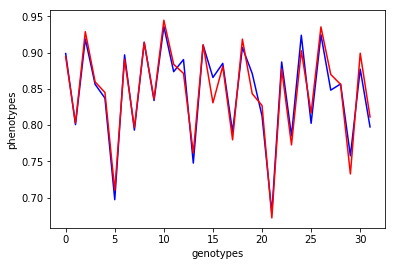

In [27]:
model.fit_widget(lmbda=(-5,5,.1), A=(-5,5,.1), B=(-5,5,.1))

In [32]:
padd = model.statistics.linear()
pobs = model.phenotypes
pmodeladd = np.linspace(min(padd), max(padd),1000)
pmodelobs = model.function(pmodeladd, *model.parameters.get_params())

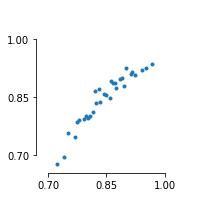

In [62]:
fig, ax = plt.subplots(figsize=(3,3))

ax.plot(padd, pobs, '.')
#ax.plot(pmodeladd, pmodelobs, 'r-')
ax.axis('equal')
ax.axis([0.67, 1.1, 0.63, 1.1])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_bounds(.7, 1)
ax.spines['left'].set_bounds(.7, 1)
ax.set_xticks(np.linspace(0.7, 1, 3))
ax.set_yticks(np.linspace(0.7, 1, 3))
fig.savefig()

(<matplotlib.figure.Figure at 0x10ace4978>,
 <matplotlib.axes._subplots.AxesSubplot at 0x10af42828>)

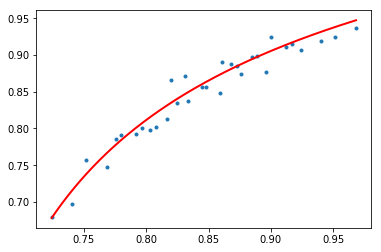

In [28]:
model.plot.best_fit()